# Remove false positives from SM Error - poor subtraction

Some false positives are due to a poor subtraction of absorption features from SM. This can be seen when an emission line is found in the residuals, but at that wavelength, there is an absorption feature in the spectrum or simply continuum. 

This eliminates 14 events.

# Plots for Paper

In [107]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.io.fits as fits
from glob import glob

plt.rcParams["figure.figsize"] = (8,5)

plt.rcParams["figure.figsize"] = (12,7.5)
plt.rcParams.update({'font.size': 19})

directory = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/6sResults/'
persistent_residuals = pd.read_csv(directory + 'r_persistent_events.csv')

In [108]:
star = 'HIP14286'
persistent_residuals[persistent_residuals['star'] == star]

,Unnamed: 0,star,identifier,r shifted wl,r unshifted wl,r heights,r AMD heights,rounded r shifted wl,observation time,rounded r unshifted wl
4,15,HIP14286,HIP14286_3,5004.504441,5004.385866,0.132577,6.454437,5004.5,2018-11-05T08:02:23.48,5004.38
5,14,HIP14286,HIP14286_2,5004.504441,5004.385866,0.133850,6.492382,5004.5,2018-11-05T08:08:28.93,5004.38
6,13,HIP14286,HIP14286_1,5004.504441,5004.385866,0.129181,6.790105,5004.5,2018-11-05T07:56:10.17,5004.38


In [109]:
observed_wl = 5004.385866
rest_wl = 5004.504441

In [110]:
apf_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/apf_data_files/'
observed_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/observed_data_files/'
rest_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/rest_data_files/'
resid_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/resid_data_files/'

APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl_image = wl_file[0].data

apf_files = np.load(apf_directory + star + '.npy')
observed_files = np.load(observed_directory + star + '.npy')
rest_files = np.load(rest_directory + star + '.npy')
resid_files = np.load(resid_directory + star + '.npy')

arr = np.round(wl_image, 1) == np.round(observed_wl, 1)
order = np.where(arr)[0][0]

# Plot for Paper

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP14286_1_NDRS.fits
HIP14286
2018-11-05T07:56:10.17


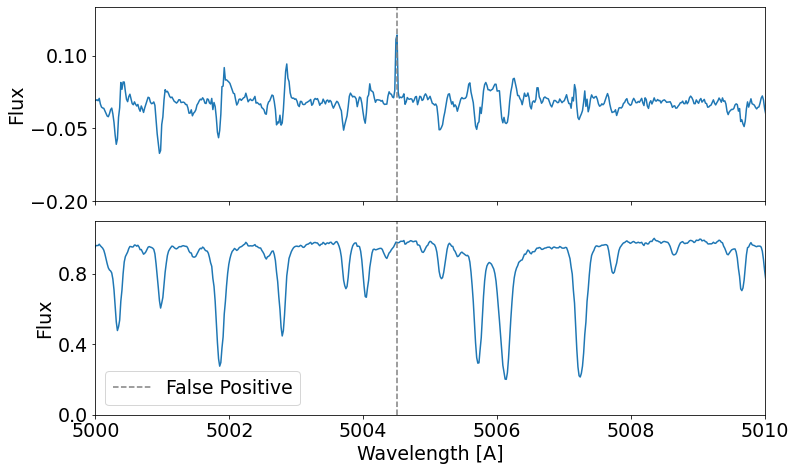

In [111]:
for file in resid_files:
    if 'HIP14286_1_NDRR.fits' in file:
        subfile = fits.open(file)
        flux = subfile[1].data
        wl = subfile[2].data

        resid_wl = wl
        resid_fl = flux

for file in rest_files:
    if 'HIP14286_1_NDRS.fits' in file:
        if 'NDRR' in file:
            print('skipped')
            continue
        subfile = fits.open(file)
        flux = subfile[0].data
        wl = subfile[1].data

        header = subfile[0].header
        star = header['TOBJECT']
        date = header['DATE-OBS']
        print(file)
        print(star)
        print(date)
        
# plt.axvline(rest_wl, ls='--', color='gray', label='False Positive')
# plt.plot(wl, flux)
# plt.xlim(rest_wl - 6, rest_wl + 6)
# # plt.title('SM Rest Frame Spectrum')
# plt.xlabel('Wavelength [A]')
# plt.ylabel('Flux')
# plt.legend()
# plt.show()
        

fig, axs = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=.1)

axs[0].plot(resid_wl, resid_fl)
axs[0].axvline(rest_wl, ls='--', color='gray', label='False Positive')
axs[0].set_ylim(-0.2, 0.2)
axs[0].set_yticks(np.arange(-0.2, 0.2, 0.15))
axs[0].set_ylabel('Flux')

axs[1].plot(wl, flux)
axs[1].axvline(rest_wl, ls='--', color='gray', label='False Positive')
axs[1].set_ylim(0, 1.1)
axs[1].set_yticks(np.arange(0, 1.2, 0.4))
axs[1].set_ylabel('Flux')

plt.xlim(5000, 5010)
plt.xlabel('Wavelength [A]')
plt.legend()

# # Plot 1:
# fig, axs = plt.subplots(2, 2)
# fig.subplots_adjust(left=0.2, wspace=0.6)
# make_plot(axs)

# just align the last column of axes:
fig.align_ylabels(axs[0])
plt.show()

plt.show()

## Plot SM residuals in rest frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP14286_1_NDRR.fits
HIP14286
2018-11-05T07:56:10.17


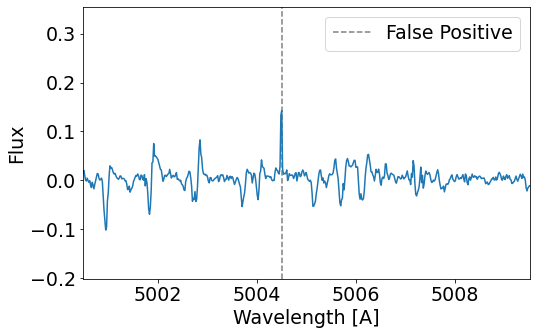

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP14286_2_NDRR.fits
HIP14286
2018-11-05T08:08:28.93


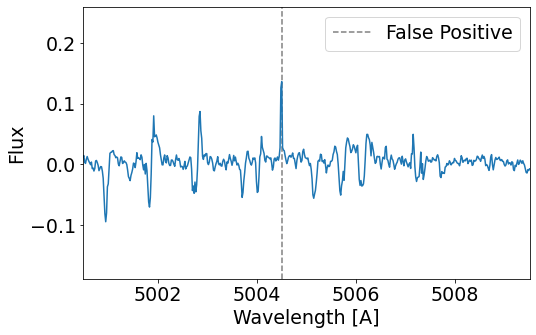

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP14286_3_NDRR.fits
HIP14286
2018-11-05T08:02:23.48


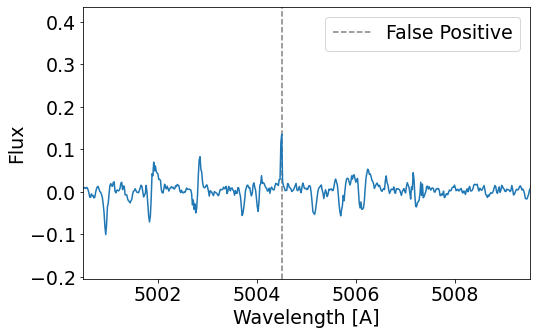

In [27]:
for file in resid_files:
    subfile = fits.open(file)
    flux = subfile[1].data
    wl = subfile[2].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.axvline(rest_wl, ls='--', color='gray', label='False Positive')
    plt.plot(wl, flux)
    plt.xlim(rest_wl-4, rest_wl+5)
    plt.xlabel('Wavelength [A]')
    plt.ylabel('Flux')
    plt.legend()
    # plt.title('Residual')
    plt.show()

## Plot SM spectra in rest frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP14286_1_NDRS.fits
HIP14286
2018-11-05T07:56:10.17


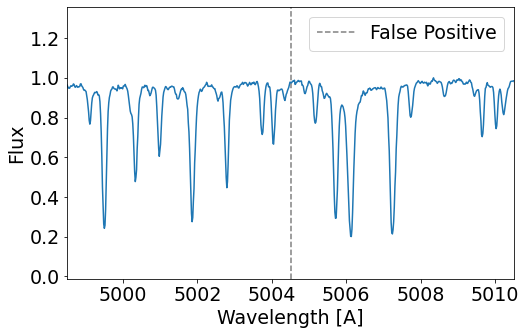

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP14286_2_NDRS.fits
HIP14286
2018-11-05T08:08:28.93


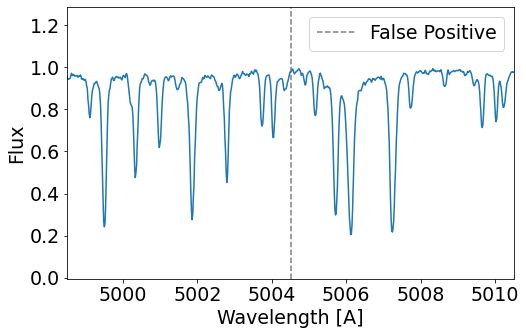

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP14286_3_NDRS.fits
HIP14286
2018-11-05T08:02:23.48


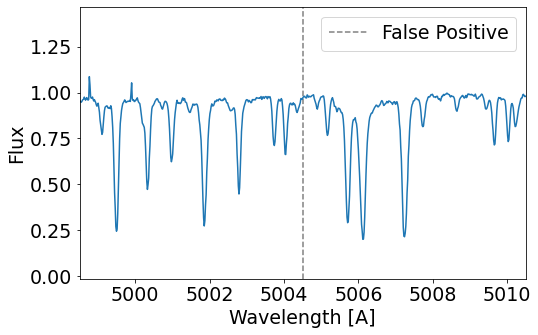

In [28]:
for file in rest_files:
    if 'NDRR' in file:
        print('skipped')
        continue
    subfile = fits.open(file)
    flux = subfile[0].data
    wl = subfile[1].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.axvline(rest_wl, ls='--', color='gray', label='False Positive')
    plt.plot(wl, flux)
    plt.xlim(rest_wl - 6, rest_wl + 6)
    # plt.title('SM Rest Frame Spectrum')
    plt.xlabel('Wavelength [A]')
    plt.ylabel('Flux')
    plt.legend()
    plt.show()

## Plot SM spectra in observed frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP14286_1_NDRU.fits
HIP14286
2018-11-05T07:56:10.17


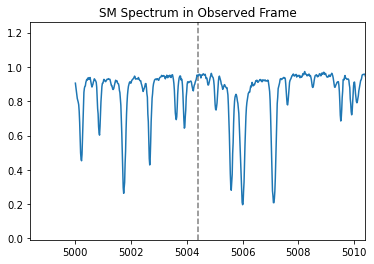

5899.98996409431
5000.005552883154
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP14286_2_NDRU.fits
HIP14286
2018-11-05T08:08:28.93


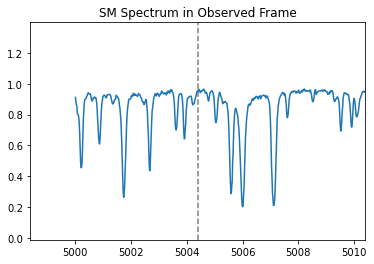

5899.98996409431
5000.005552883154
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP14286_3_NDRU.fits
HIP14286
2018-11-05T08:02:23.48


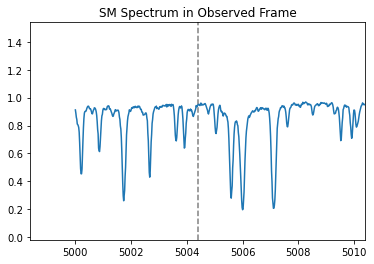

5899.98996409431
5000.005552883154


In [14]:
for file in observed_files:
    if 'NDRR' in file:
        continue
    subfile = fits.open(file)
    flux = subfile[0].data
    wl = subfile[1].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.axvline(observed_wl, ls='--', color='gray')
    plt.plot(wl, flux)
    plt.xlim(observed_wl - 6, observed_wl + 6)
    plt.title('SM Spectrum in Observed Frame')
    plt.show()
    print(max(wl))
    print(min(wl))

## Plot all the APF plots

HIP14286
2018-11-05T07:56:10.17
/datag/blpd0/datax/apf/rbhv.239.fits


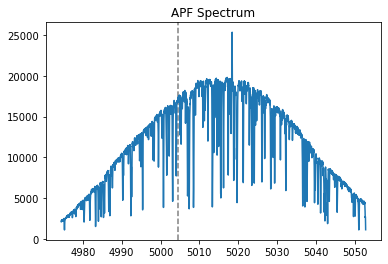

HIP14286
2018-11-05T08:08:28.93
/datag/blpd0/datax/apf/rbhv.241.fits


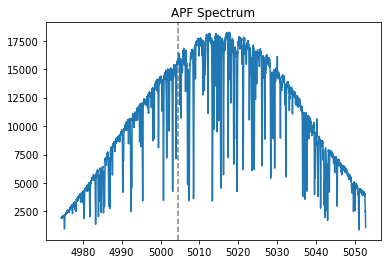

HIP14286
2018-11-05T08:02:23.48
/datag/blpd0/datax/apf/rbhv.240.fits


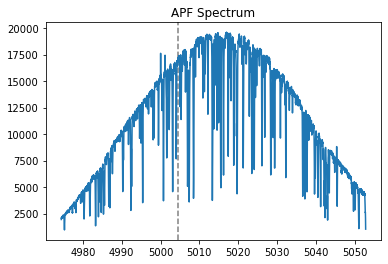

In [15]:
for file in apf_files:
    fl_file = fits.open(file)
    obj = fl_file[0].header['TOBJECT']
    date = fl_file[0].header['DATE-OBS']
    print(obj)
    print(date)
    print(file)
    fl_image = fl_file[0].data
    flux = fl_image[order][:-1]
    wl = wl_image[order]
    plt.axvline(observed_wl, ls = '--', color='gray')
    plt.plot(wl, flux)
#     plt.ylim(14000, 15000)
    # plt.xlim(observed_wl - 6, observed_wl + 6)
    plt.title('APF Spectrum')
    plt.show()